In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner

import os
import sys
from pathlib import Path
path = Path(os.getcwd())
path_parent=str(path.parent.absolute())
path_module=path_parent+'/src/SuPerSim'
sys.path.insert(0, os.path.abspath(path_module))

from SuPerSim import get_all_stats, load_all_pickles, plot_all

In [2]:
################################################
# Here, write the paths to your own data files #
################################################

# this is just introduced for convenience
path_data = path_parent+'/examples/data/'

# those are the real variables
path_forcing_merra2 = path_data+'/scaled_merra2_Aksaut.nc'
path_ground = path_data+'North/result_soil_temperature.nc'
path_snow = path_data+'North/result_snow_depth.nc'
path_swe = path_data+'North/result_swe.nc'
path_thaw_depth = path_data+'North/result_thaw_depth.nc'
path_repository = path_data+'North/folder_manifest.csv'
path_pickle = path_parent+'/examples/python_pickles/'

path_horizon = path_data+'/horizon.csv'

###############################################################
# Enter the parameters of your site and of the rockfall event #
###############################################################

site = 'Aksaut_North'
year_bkg_end = 2010
year_trans_end = 2023
forcing_list = ['merra2']
path_forcing_list = [path_forcing_merra2]
date_event = [2021, 12, 31]
topo_event = []
no_weight = True
consecutive = 7
glacier = False
min_glacier_depth = 100

Succesfully opened the pre-existing pickle: df_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: melt_out_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: df_stats_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: rockfall_values_Aksaut_North.pkl

---------------------------------------------------------------------------------------------

Fisheye view of the sky with the visible portion in blue and the blocked one in black:


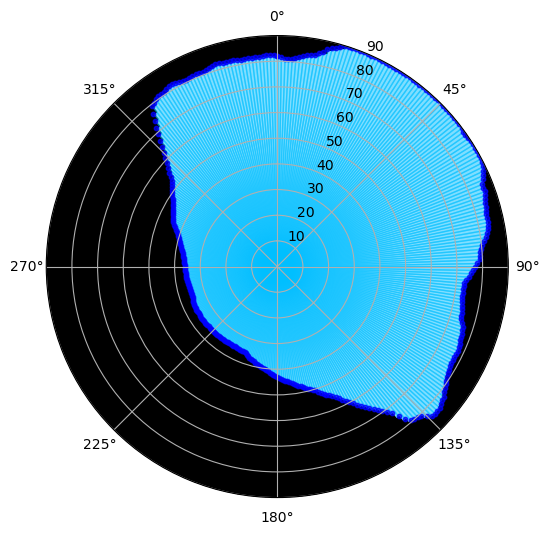


---------------------------------------------------------------------------------------------

The following plot is a histogram of the distribution of the statistical weights of all simulations:


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
###############
# Ready to go #
###############

# When used for the first time, it createss the pickles
# When the pickles already exist, it simply loads them
# but it's easier to use the function 'load_all_pickles' for that
pkl = get_all_stats(
    forcing_list, path_forcing_list, path_repository, path_ground, path_snow, path_pickle,
    year_bkg_end, year_trans_end, consecutive,
    site, date_event, topo_event,
    glacier, min_glacier_depth)
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# this is a function that allows the used to load the pickles in a much simpler way
pkl = load_all_pickles(site, path_pickle)
df = pkl['df']
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# Finally, we can produce all the summary plots
plot_all(site, forcing_list, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth, path_pickle,
         year_bkg_end, year_trans_end,
         path_horizon=path_horizon, no_weight=True, show_glaciers=True,
         individual_heatmap=False, polar_plots=False, parity_plot=True)